In [1]:
import shutil
import os
import pandas as pd
import glob

In [17]:
def list_files(filepath, filetype):
   paths = []
   for root, dirs, files in os.walk(filepath):
      for file in files:
         if file.lower().endswith(filetype.lower()):
            paths.append(os.path.join(root, file))
   return(paths)

In [16]:
df_unp = pd.read_csv('all_unpacked_images_metadata.csv', index_col=0)
print(df_unp.shape) # (599180, 19)
## Getting indexes of Camera system, lens, etc
is2019 = (df_unp['Datetime'] > "2018-12-31") & (df_unp['Datetime'] <= "2019-12-31")
is2020 = (df_unp['Datetime'] > "2019-12-31") & (df_unp['Datetime'] <= "2020-12-31")
is2021 = (df_unp['Datetime'] > "2020-12-31") & (df_unp['Datetime'] <= "2021-12-31")
is2022 = (df_unp['Datetime'] > "2021-12-31") & (df_unp['Datetime'] <= "2022-12-31")
is2023 = (df_unp['Datetime'] > "2022-12-31") & (df_unp['Datetime'] <= "2023-12-31")

## for Iver3069
is2021_befor0512 = (df_unp['Datetime'] > "2020-12-31") & (df_unp['Datetime'] <= "2021-05-11")
is2021_after0512 = (df_unp['Datetime'] > "2021-05-11") & (df_unp['Datetime'] <= "2021-12-31")
is2022_prior0716 = (df_unp['Datetime'] > "2021-12-31") & (df_unp['Datetime'] <= "2022-07-15")
is2022_0720t0809 = (df_unp['Datetime'] > "2022-07-19") & (df_unp['Datetime'] <= "2022-08-09")
is2022_0810t0814 = (df_unp['Datetime'] > "2022-08-09") & (df_unp['Datetime'] <= "2022-08-14")
is2022_0815t0818 = (df_unp['Datetime'] > "2022-08-14") & (df_unp['Datetime'] <= "2022-08-18")
is2022_0819t0822 = (df_unp['Datetime'] > "2022-08-18") & (df_unp['Datetime'] <= "2022-08-22")
is2022_after0822 = (df_unp['Datetime'] > "2022-08-22") & (df_unp['Datetime'] <= "2022-12-31")

is2023_after0809 = (df_unp['Datetime'] > "2023-08-08") & (df_unp['Datetime'] <= "2022-12-31")

## for Iver3098
is2022_0705t0810 = (df_unp['Datetime'] > "2022-07-05") & (df_unp['Datetime'] <= "2022-08-10")
is2022_0811t0819 = (df_unp['Datetime'] > "2022-08-10") & (df_unp['Datetime'] <= "2022-08-19")
is2022_after0819 = (df_unp['Datetime'] > "2022-08-19") & (df_unp['Datetime'] <= "2022-12-31")

is2023_0427t0522 = (df_unp['Datetime'] > "2023-04-27") & (df_unp['Datetime'] <= "2023-05-22")
is2023_0523t0711 = (df_unp['Datetime'] > "2023-05-22") & (df_unp['Datetime'] <= "2023-07-11")
is2023_0712t0808 = (df_unp['Datetime'] > "2023-07-11") & (df_unp['Datetime'] <= "2023-08-08")
is2023_after0808 = (df_unp['Datetime'] > "2023-08-08") & (df_unp['Datetime'] <= "2023-12-31")

is3069 = (df_unp['AUV']=="Iver3069")
is3098 = (df_unp['AUV']=="Iver3098")
isABS1 = (df_unp['cam_sys']=="ABS1")
isABS2 = (df_unp['cam_sys']=="ABS2")

### major groupings ###
## 2019-2020 ABS1 3069 
group_01  = df_unp[is2019 & isABS1 & is3069].index
group_02 =  df_unp[is2020 & isABS1 & is3069].index

## 2021 ABS1 3069 
group_03 =  df_unp[is2021_befor0512 & isABS1 & is3069].index
group_04 =  df_unp[is2021_after0512 & isABS1 & is3069].index

## 2022 ABS1 3069 
group_05 =  df_unp[is2022_prior0716 & isABS1 & is3069].index

## 2022 ABS2 3069 
group_06 =  df_unp[is2022_0720t0809 & isABS2 & is3069].index
group_07 =  df_unp[(is2022_0810t0814 | is2022_0819t0822) & isABS2 & is3069].index
group_08 =  df_unp[is2022_0815t0818 & isABS2 & is3069].index
group_09 =  df_unp[is2022_after0822 & isABS2 & is3069].index

## 2022 ABS2 3098 
group_10 =  df_unp[is2022_0705t0810 & isABS2 & is3098].index
group_11 =  df_unp[is2022_0811t0819 & isABS2 & is3098].index
group_12 =  df_unp[is2022_after0819 & isABS2 & is3098].index

## 2023 ABS2 3098 
group_13 =  df_unp[is2023_0427t0522 & isABS2 & is3098].index
group_14 =  df_unp[is2023_0523t0711 & isABS2 & is3098].index
group_15 =  df_unp[is2023_0712t0808 & isABS2 & is3098].index

## 2023 ABS2 3069 
group_16 =  df_unp[is2023_after0808 & isABS2 & is3069].index

C:\Users\ageglio\AppData\Local\Temp\1\ipykernel_9156\3946088740.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unp = pd.read_csv('all_unpacked_images_metadata.csv', index_col=0)


(599180, 19)


In [3]:
## Checking for missed idx

all_groups = group_01.union(group_02).union(group_03).union(group_04).union(
             group_05).union(group_06).union(group_07).union(group_08).union(
             group_09).union(group_10).union(group_11).union(group_12).union(
             group_13).union(group_14).union(group_15)
df_unp.index.difference(all_groups)

Index([], dtype='int64')

In [4]:
groups = [group_01, group_02, group_03, group_04, group_05, 
          group_06, group_07, group_08, group_09, group_10, 
          group_11, group_12, group_13, group_14, group_15, group_16]
i = 0
for group in groups:
    l = len(group)
    print(l, end=", ")
    i +=l
print("total", i)
# 3363, 193971, 3855, 174036, 74222, 10446, 3330, 769, 38791, 27144, 9417, 17852, 1785, 19168, 21031, 0, total 599180
# 3363, 193971, 3855, 174036, 74222, 10446, 3330, 769, 38791, 27144, 9417, 17852, 1785, 19168, 10097, 0, total 588246

3363, 193971, 3855, 174036, 74222, 10446, 3330, 769, 38791, 27144, 9417, 17852, 1785, 19168, 21031, 0, total 599180


In [15]:
def del_files(filepath_list): 
    for filepath in filepath_list:
        if os.path.isfile(filepath):
            os.remove(filepath)
        else:
            # If it fails, inform the user.
            print("Error: %s file not found" % filepath)
def copy_imgs_2_drive(df, group, dest_folder):
    img_pth_list = list(df.loc[group, 'image_path'])
    img_nam_list = list(df.loc[group, 'image_name'])
    num_imgs = len(img_nam_list)
    i=0
    for img_pth, img_name in zip(img_pth_list, img_nam_list):
        src = img_pth
        dest = os.path.join(dest_folder, img_name)
        # File copy was interrupted often due to network, added src/dest comparison
        if os.path.exists(dest):
            if os.stat(src).st_size == os.stat(dest).st_size:
                i+=1
            else:
                shutil.copy(src, dest)
                i+=1
        else:
            shutil.copy(src, dest)
            i+=1
        print("Copying", i,"/",num_imgs, end='  \r')
## Sea Lamprey
## Groups: 4-, 10- ,11-, 12-, 13, 14-, 15-

## Lake Chub
## Groups 01-, 02-, 03-, 05-, 06-, 07-, 08-, 09-
group = group_13
dest_folder = "G:\\group_13"

copy_imgs_2_drive(df_unp, group, dest_folder)

In [30]:
''' 
Images are typically 9-11 Mb, so one way to filter out unusable images is to set a threshold for file-size
Here, I set the threshold to 4 Mb, and I found there were 3,334 images in group 4 alone below 4 mb, probably unusable
'''
import glob
import os
import shutil
src_files = glob.glob(r"Z:\__Organized_Directories_InProgress\2021_UnpackedCollects\20210916_001_Iver3069_ABS1_Every25th\image_raw\*.png")
dest_folder = r"Z:\__Organized_Directories_InProgress\2021_UnpackedCollects\20210916_001_Iver3069_ABS1_Every25th\image_raw\Unusable"
thresh = 15.3e6
def select_imgs_by_size(src_files, dest_folder=None, thresh=4e5):
    sm_files_list = []
    for file in src_files:
        s = os.path.getsize(file)
        if s < thresh:
            sm_files_list.append(s)
            shutil.move(file, dest_folder) ## If you want to move them

select_imgs_by_size(src_files, dest_folder=dest_folder, thresh=thresh)

In [20]:
import pickle

with open(os.path.join(r"C:\Users\ageglio\ageglio-1\Indexing-AUV-data\2019-2023-updated\images_2021.txt"), "rb") as fp:   
    imgs_filepaths_2021 = pickle.load(fp)

src_files = imgs_filepaths_2021
def get_imgs_size(src_files):
    files_sz_list = []
    for file in src_files:
        try:
            s = os.path.getsize(file)
            files_sz_list.append(s)
        except: pass

    return files_sz_list

files_sz_list_2021 = get_imgs_size(src_files=src_files)

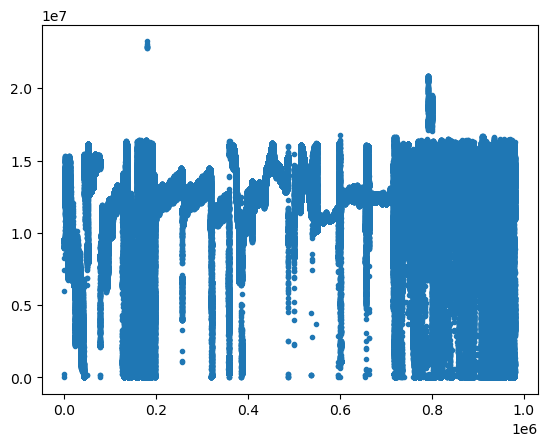

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot((files_sz_list_2021), linestyle=" ", marker='.')
